<a href="https://colab.research.google.com/github/Kanaru2/Kanaru/blob/main/Phase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving PHASE 2 GROUP 10 (1).xlsx to PHASE 2 GROUP 10 (1) (6).xlsx
Dataset Columns: Index(['Gender', 'Age (Years)', 'Height (m)', 'Weight (kg)',
       'Family History of Overweight',
       'Frequent High Caloric Food Consumption',
       'Vegetable Consumption Frequency', 'Number of Main Meals',
       'Food Consumption Between Meals', 'Smoker', 'Daily Water Intake (L)',
       'Calorie Consumption Monitoring', 'Physical Activity Frequency',
       'Technology Usage (Hours/Day)', 'Alcohol Consumption',
       'Mode of Transportation', 'BMI', 'BMI Classification'],
      dtype='object')
Loaded existing model.


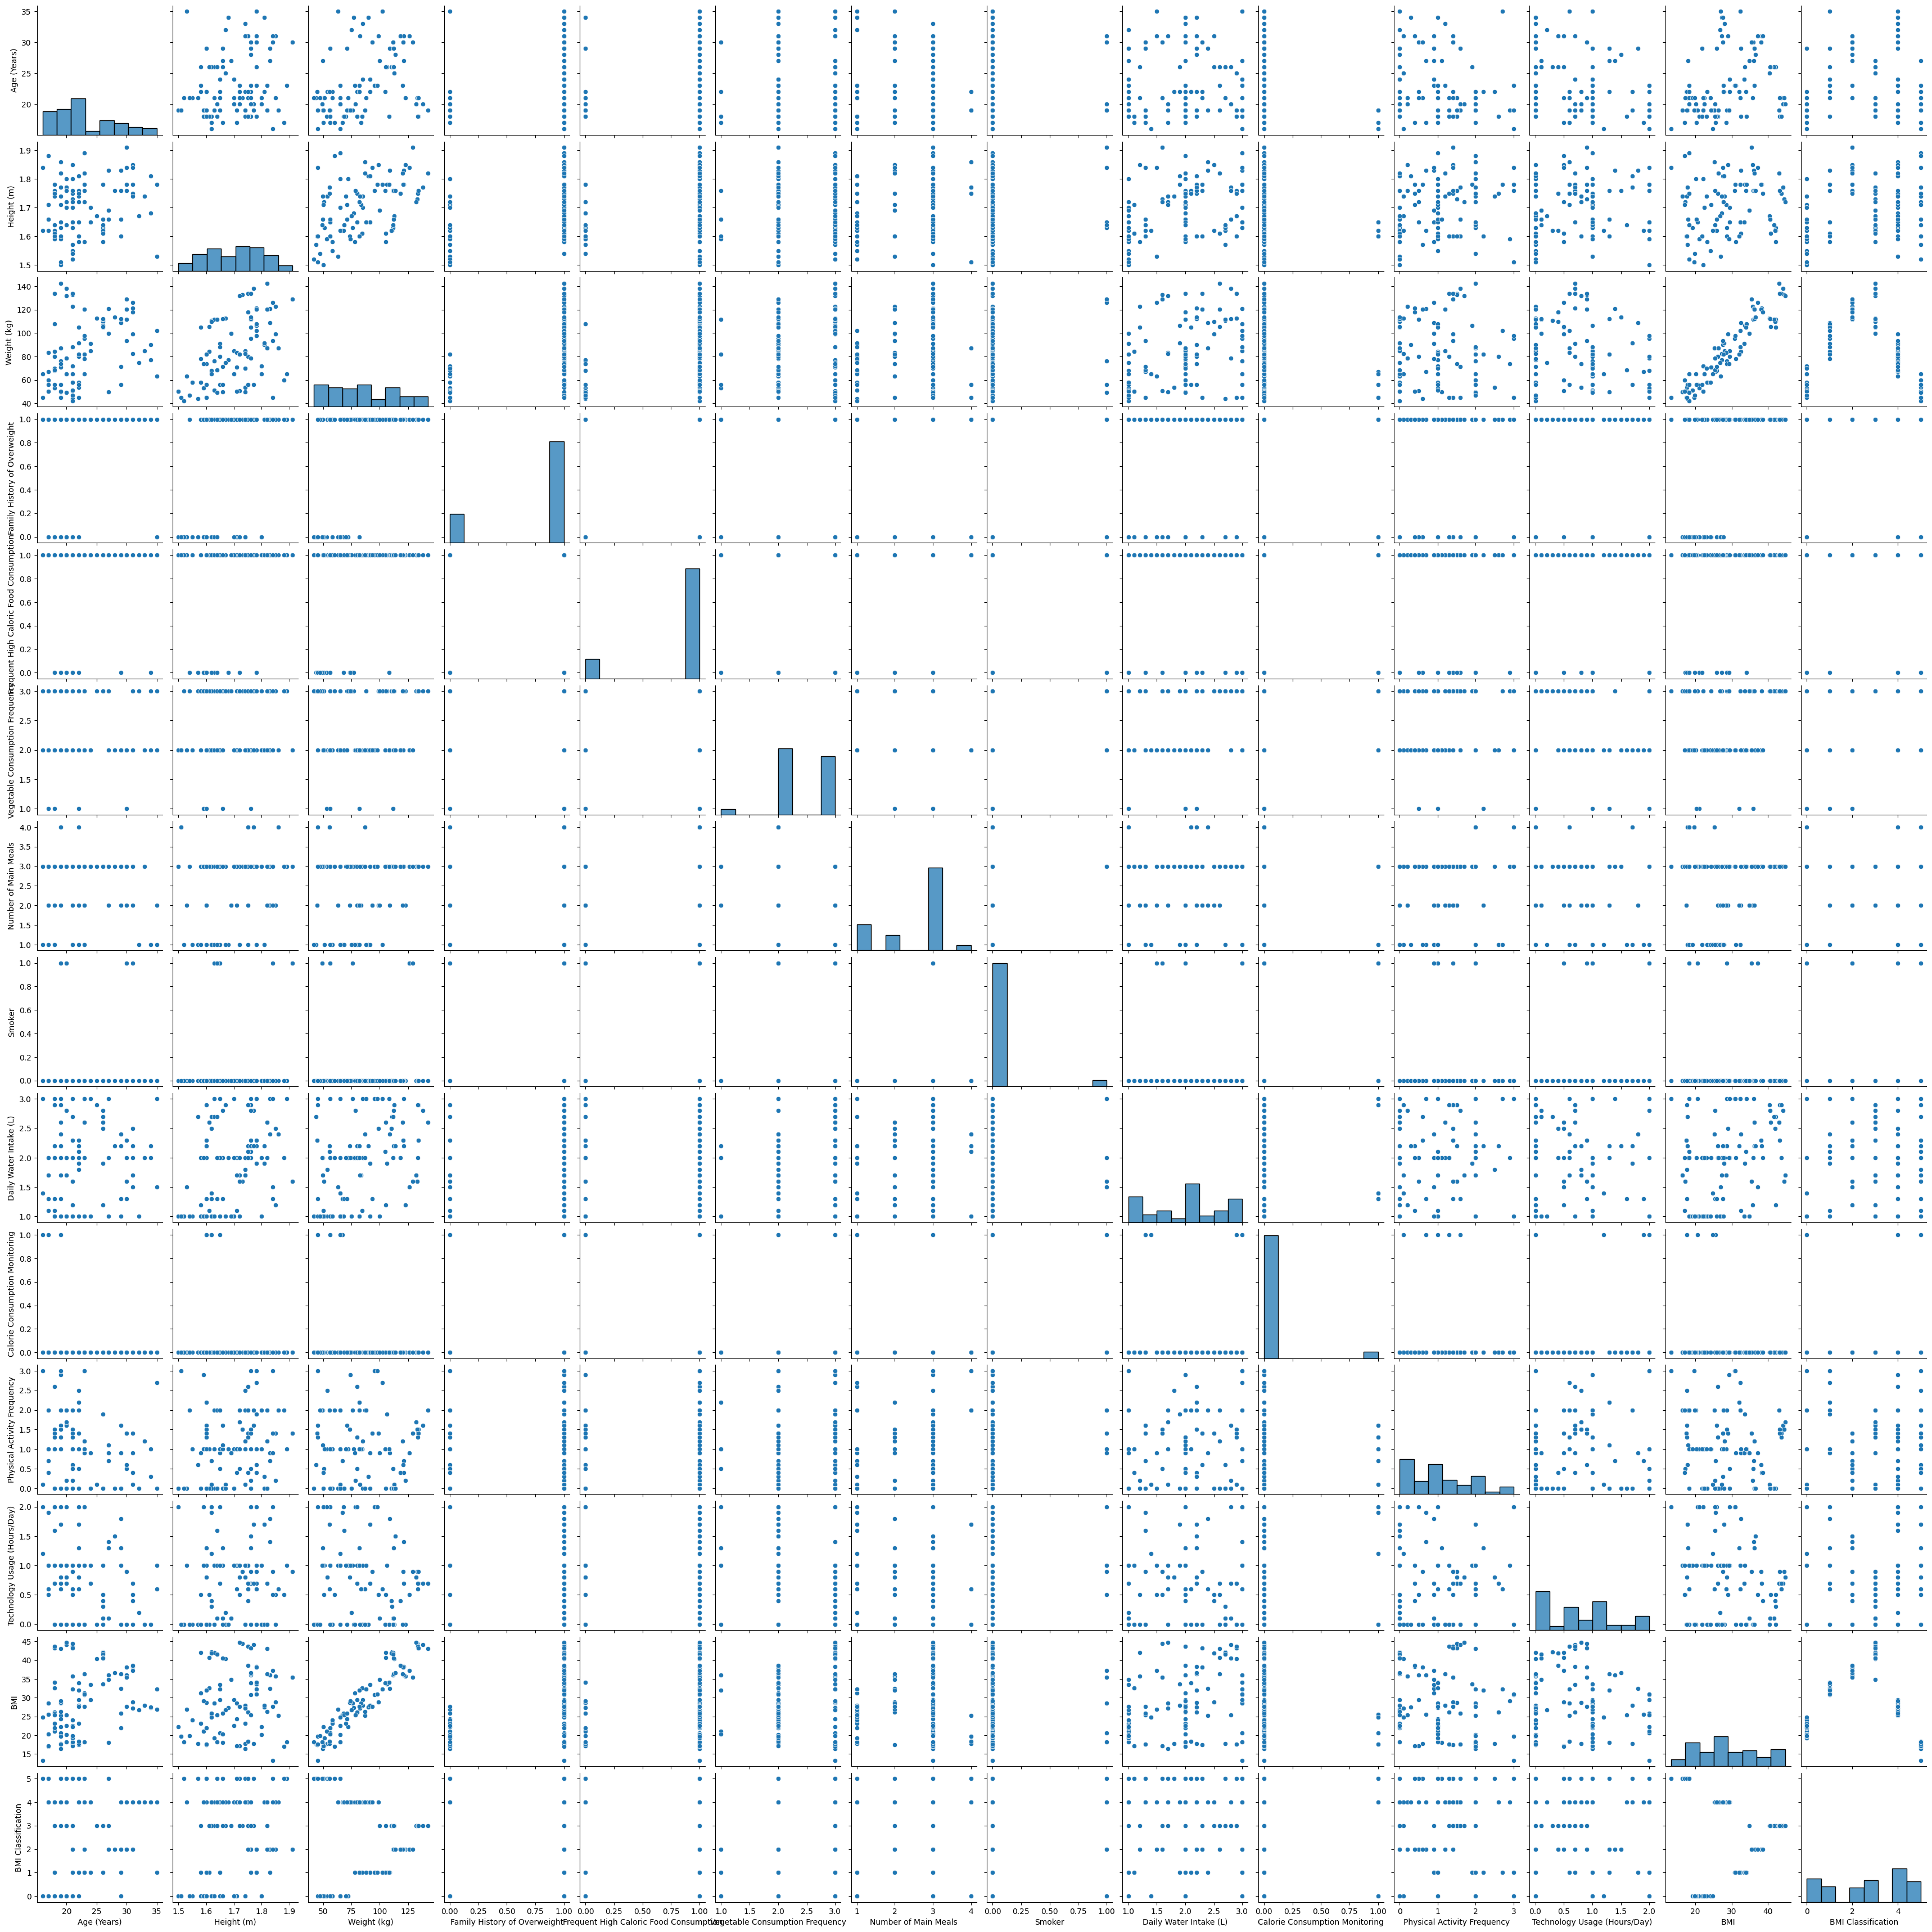

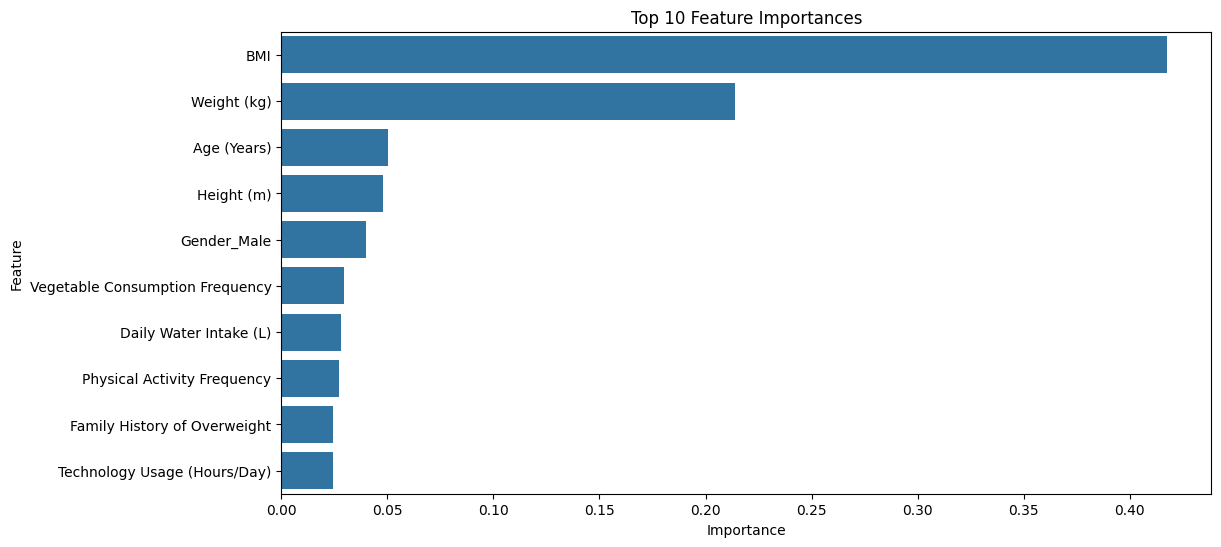

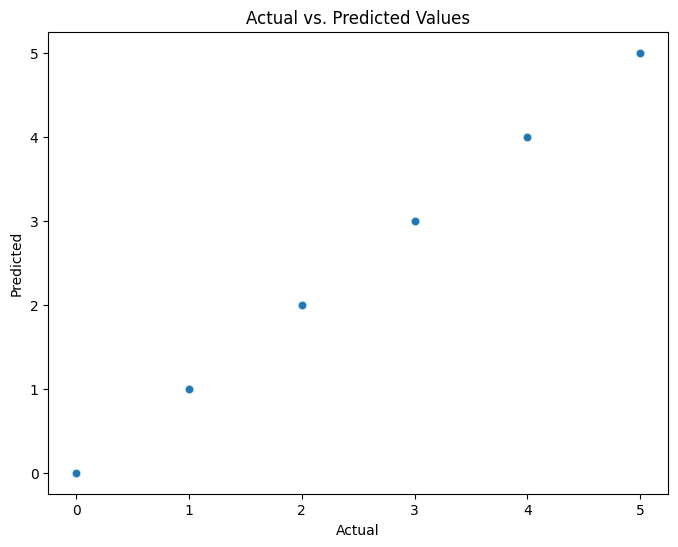

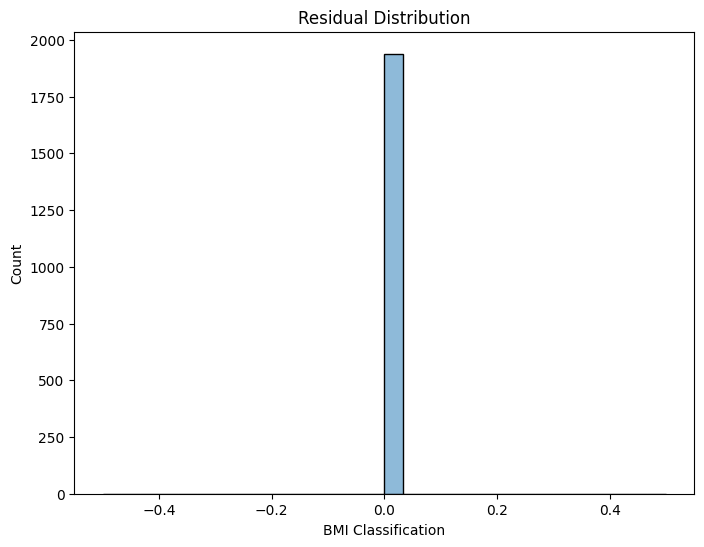

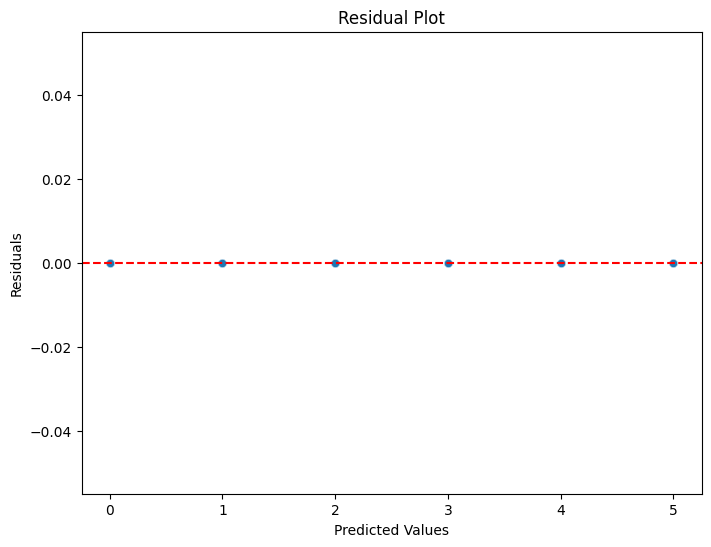

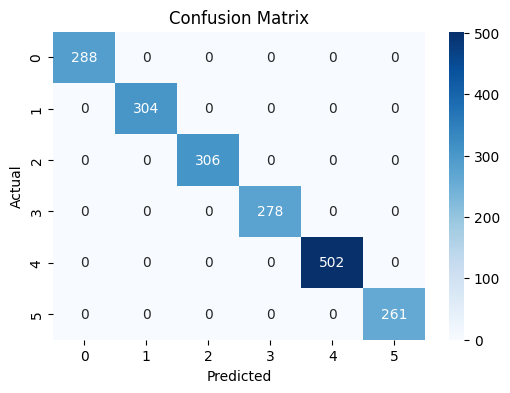

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       304
           2       1.00      1.00      1.00       306
           3       1.00      1.00      1.00       278
           4       1.00      1.00      1.00       502
           5       1.00      1.00      1.00       261

    accuracy                           1.00      1939
   macro avg       1.00      1.00      1.00      1939
weighted avg       1.00      1.00      1.00      1939



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from google.colab import files

# Upload file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]


df = pd.read_excel(file_path, sheet_name="Cleaned Data")
print("Dataset Columns:", df.columns)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BMI Classification'] = le.fit_transform(df['BMI Classification'])


X = df.drop(columns=['BMI Classification'])
y = df['BMI Classification']


categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model_path = "best_model.pkl"
if os.path.exists(model_path):
    best_model = joblib.load(model_path)
    print("Loaded existing model.")
else:
    print("Model not found! Training a new Random Forest model...")
    best_model = RandomForestClassifier(n_estimators=100, random_state=42)
    best_model.fit(X_scaled, y)
    joblib.dump(best_model, model_path)
    print("New model trained and saved as best_model.pkl.")


y_pred = best_model.predict(X_scaled)


if 'Age' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title("Age Distribution")
    plt.show()
else:
    print("Warning: 'Age' column not found in dataset.")

if 'Income' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['Income'])
    plt.title("Income Distribution with Outliers")
    plt.show()
else:
    print("Warning: 'Income' column not found in dataset.")

sns.pairplot(df.sample(min(100, len(df))))
plt.show()


if isinstance(best_model, RandomForestClassifier):
    importances = best_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title("Top 10 Feature Importances")
    plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()


residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y, y_pred))


After running the model, the confusion matrix provides insight into how well the Random Forest classifier predicts BMI classifications, with a strong diagonal presence indicating accurate predictions. The classification report highlights key performance metrics such as precision, recall, and F1-score, helping identify any imbalances in prediction accuracy across different BMI categories. The feature importance chart reveals which variables most influence the model’s decisions, allowing for better interpretability—key features might include age, weight, or lifestyle factors. Additionally, the actual vs. predicted scatter plot indicates whether the model struggles with specific BMI classifications, while the residual analysis helps detect patterns in prediction errors. If residuals are randomly distributed, the model generalizes well; if not, there might be systematic errors. The pairplot and histograms provide further understanding of data distribution and potential patterns. Overall, if accuracy is high and misclassifications are minimal, the model performs well. However, if significant errors persist, tuning hyperparameters, addressing class imbalances, or trying different algorithms may improve results.